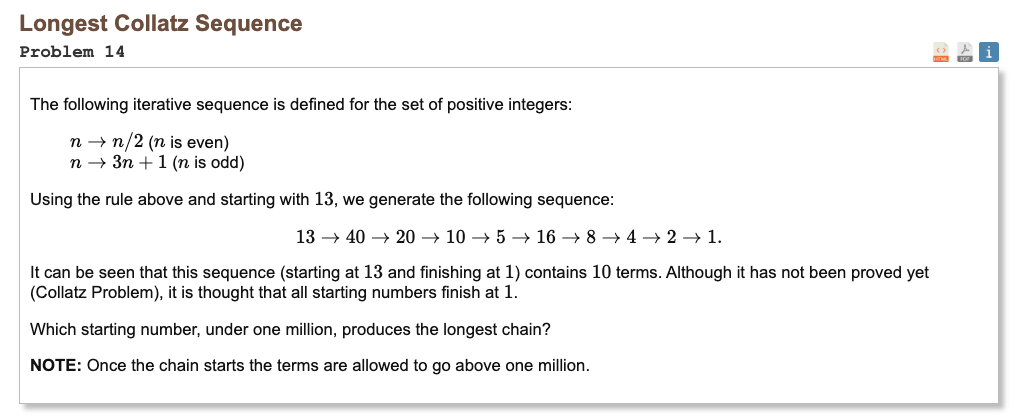

## Initial approach

* Define function to calculate Collatz sequence length.
* Start list with input number.
* While number ≠ 1:
  * If odd → 3x + 1
  * If even → x / 2
  * Append to list
* Return list length
* Initialize `max_length = 1`, `term_number = 1`
* Loop from 1 to 999,999:
  * Calculate sequence length
  * If length > max_length: Update max_length and term_number

In [1]:
%%time

def length_of_sequence(x):
    list1=[x]
    while x!=1:
        if x%2!=0:
            x=3*x+1
        else:
            x=x/2
        list1.append(int(x))
    return(len(list1))

max_length = 0
term_number = 1
for i in range(1,1_000_000):
    if length_of_sequence(i)>max_length:
        max_length=length_of_sequence(i)
        term_number=i
print(term_number, max_length)

837799 525
CPU times: user 16.8 s, sys: 146 ms, total: 17 s
Wall time: 17.2 s


## Clean and tested code

In [2]:
%%time

cache = {}

def length_of_sequence(x):
    original = x
    count = 1  # count the starting number itself
    while x != 1:
        if x in cache:
            count += cache[x] - 1  # avoid double-counting starting point
            break
        x = 3 * x + 1 if x % 2 else x // 2
        count += 1
    cache[original] = count
    return count

max_length = 0
term_number = 1

for i in range(1, 1_000_000):
    length = length_of_sequence(i)
    if length > max_length:
        max_length = length
        term_number = i

print(term_number, max_length)

837799 525
CPU times: user 506 ms, sys: 14.2 ms, total: 520 ms
Wall time: 520 ms
